Training Linear Regression...
Linear Regression - MSE: 4.9733, R^2: 0.6799
Training Ridge Regression...
Ridge Regression - MSE: 5.5717, R^2: 0.6414
Training Lasso Regression...
Lasso Regression - MSE: 12.0207, R^2: 0.2264
Training Elastic Net...
Elastic Net - MSE: 11.6608, R^2: 0.2495
Training K-Nearest Neighbors...
K-Nearest Neighbors - MSE: 15.7225, R^2: -0.0119
Training Support Vector Machine...
Support Vector Machine - MSE: 15.6014, R^2: -0.0041
Training Decision Tree...
Decision Tree - MSE: 7.4616, R^2: 0.5198
Training Random Forest...
Random Forest - MSE: 3.1203, R^2: 0.7992
Training Gradient Boosting...
Gradient Boosting - MSE: 2.5419, R^2: 0.8364
Training AdaBoost...
AdaBoost - MSE: 4.7095, R^2: 0.6969
Training XGBoost...
XGBoost - MSE: 2.4733, R^2: 0.8408


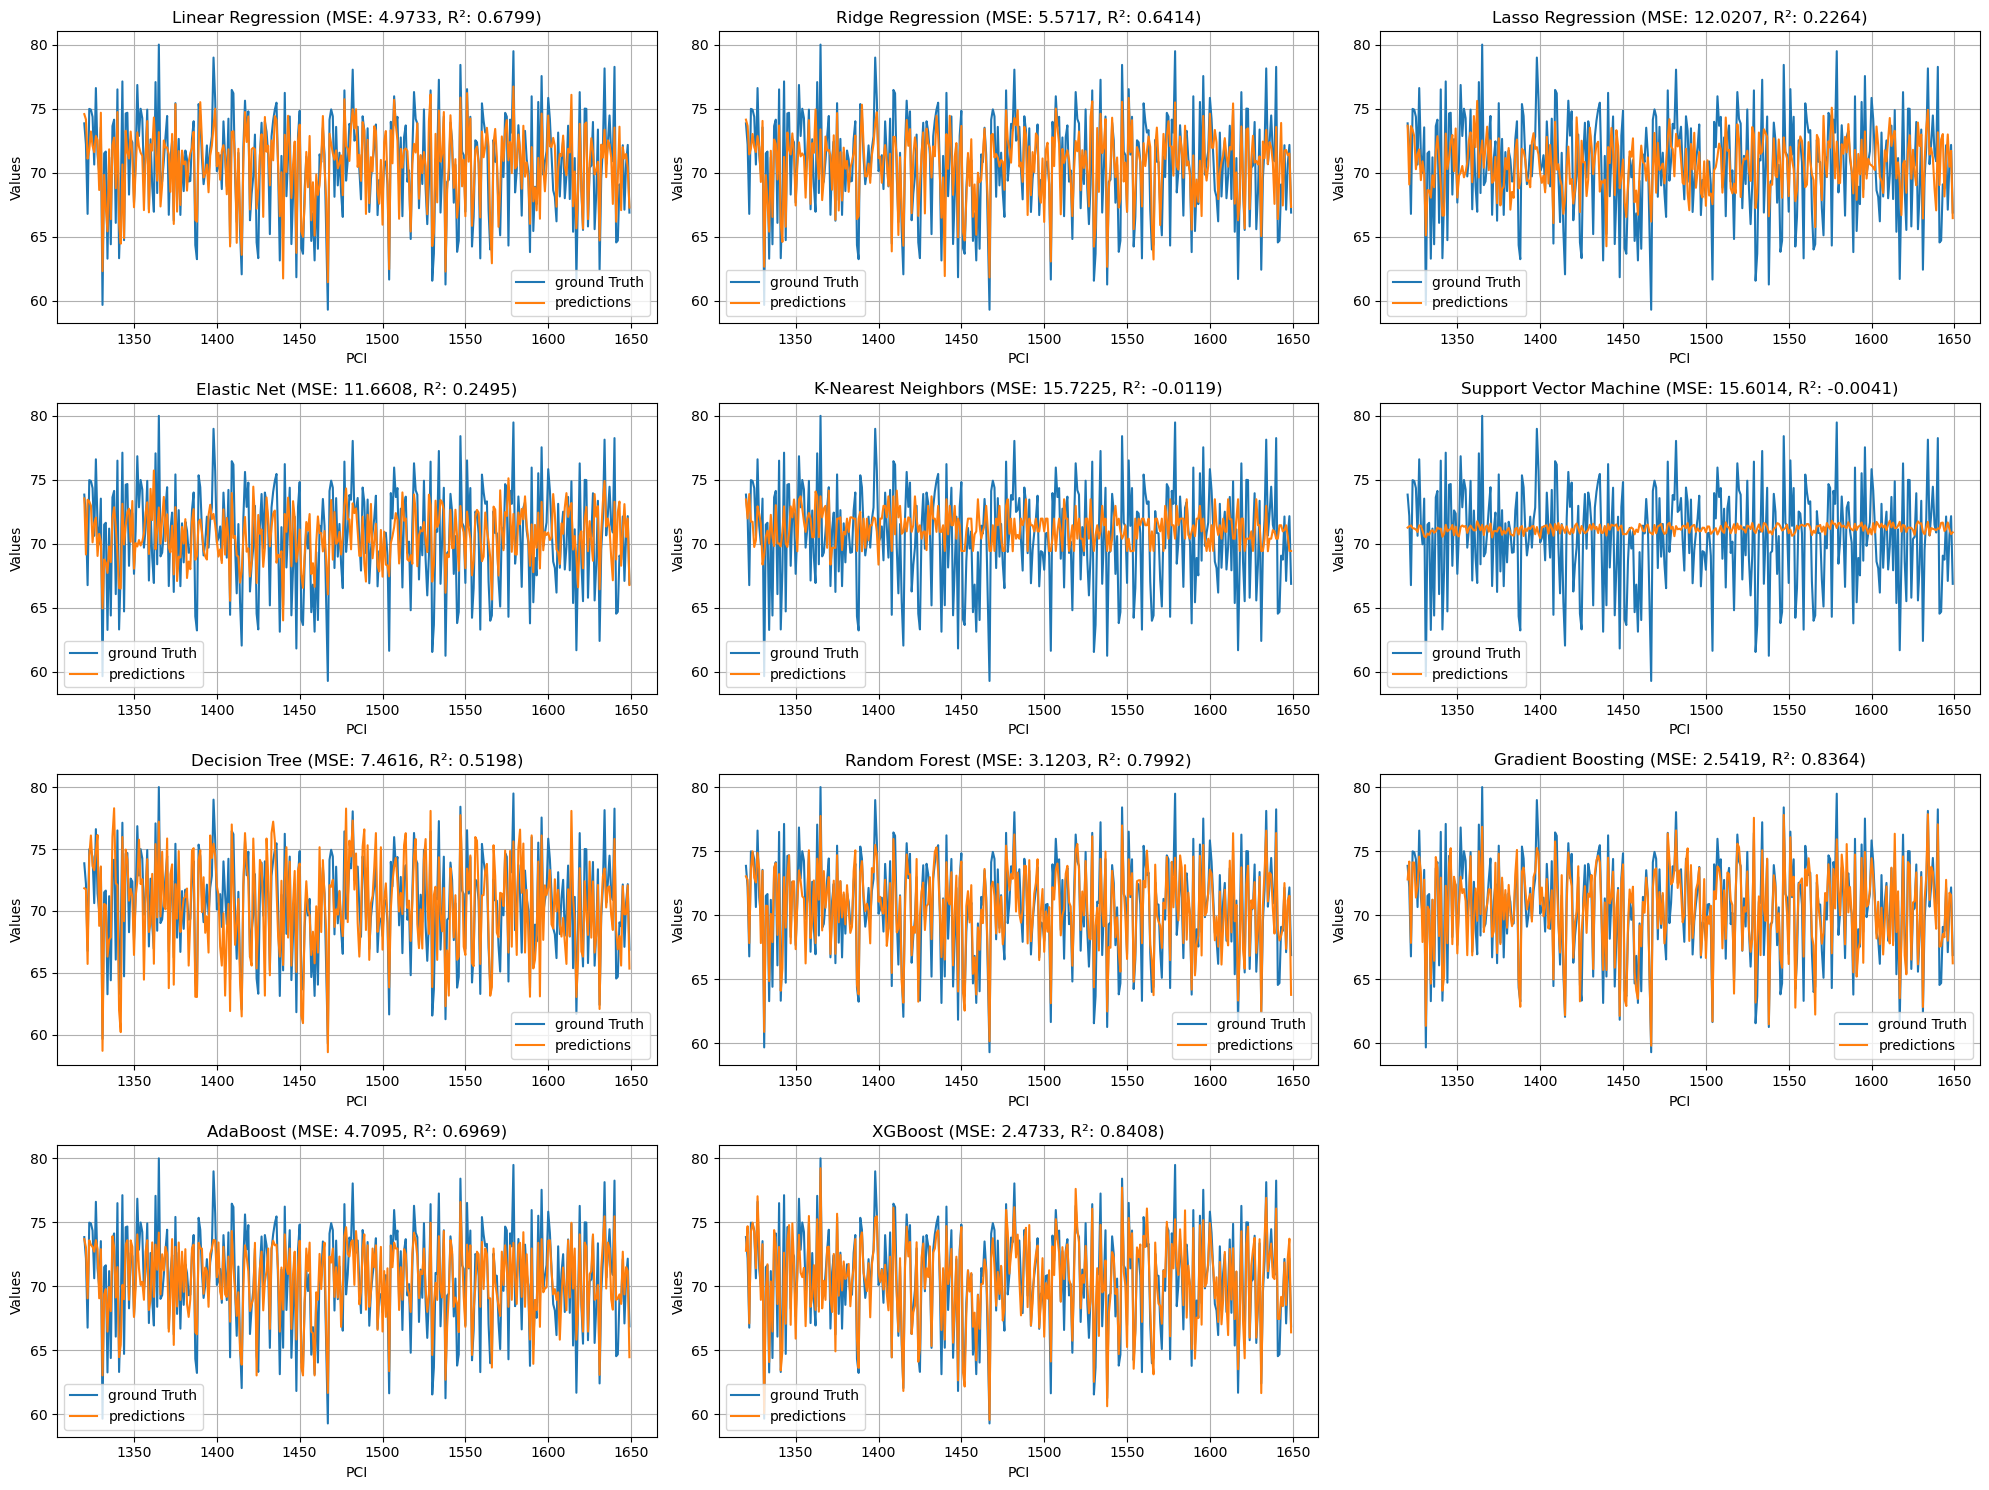

Training Linear Regression...
Linear Regression - MSE: 4.9733, R^2: 0.6799
Training Ridge Regression...
Ridge Regression - MSE: 5.5717, R^2: 0.6414
Training Lasso Regression...
Lasso Regression - MSE: 12.0207, R^2: 0.2264
Training Elastic Net...
Elastic Net - MSE: 11.6608, R^2: 0.2495
Training K-Nearest Neighbors...
K-Nearest Neighbors - MSE: 15.7225, R^2: -0.0119
Training Support Vector Machine...
Support Vector Machine - MSE: 15.6014, R^2: -0.0041
Training Decision Tree...
Decision Tree - MSE: 7.3913, R^2: 0.5243
Training Random Forest...
Random Forest - MSE: 3.2605, R^2: 0.7902
Training Gradient Boosting...
Gradient Boosting - MSE: 2.5394, R^2: 0.8366
Training AdaBoost...
AdaBoost - MSE: 4.5370, R^2: 0.7080
Training XGBoost...
XGBoost - MSE: 2.4733, R^2: 0.8408


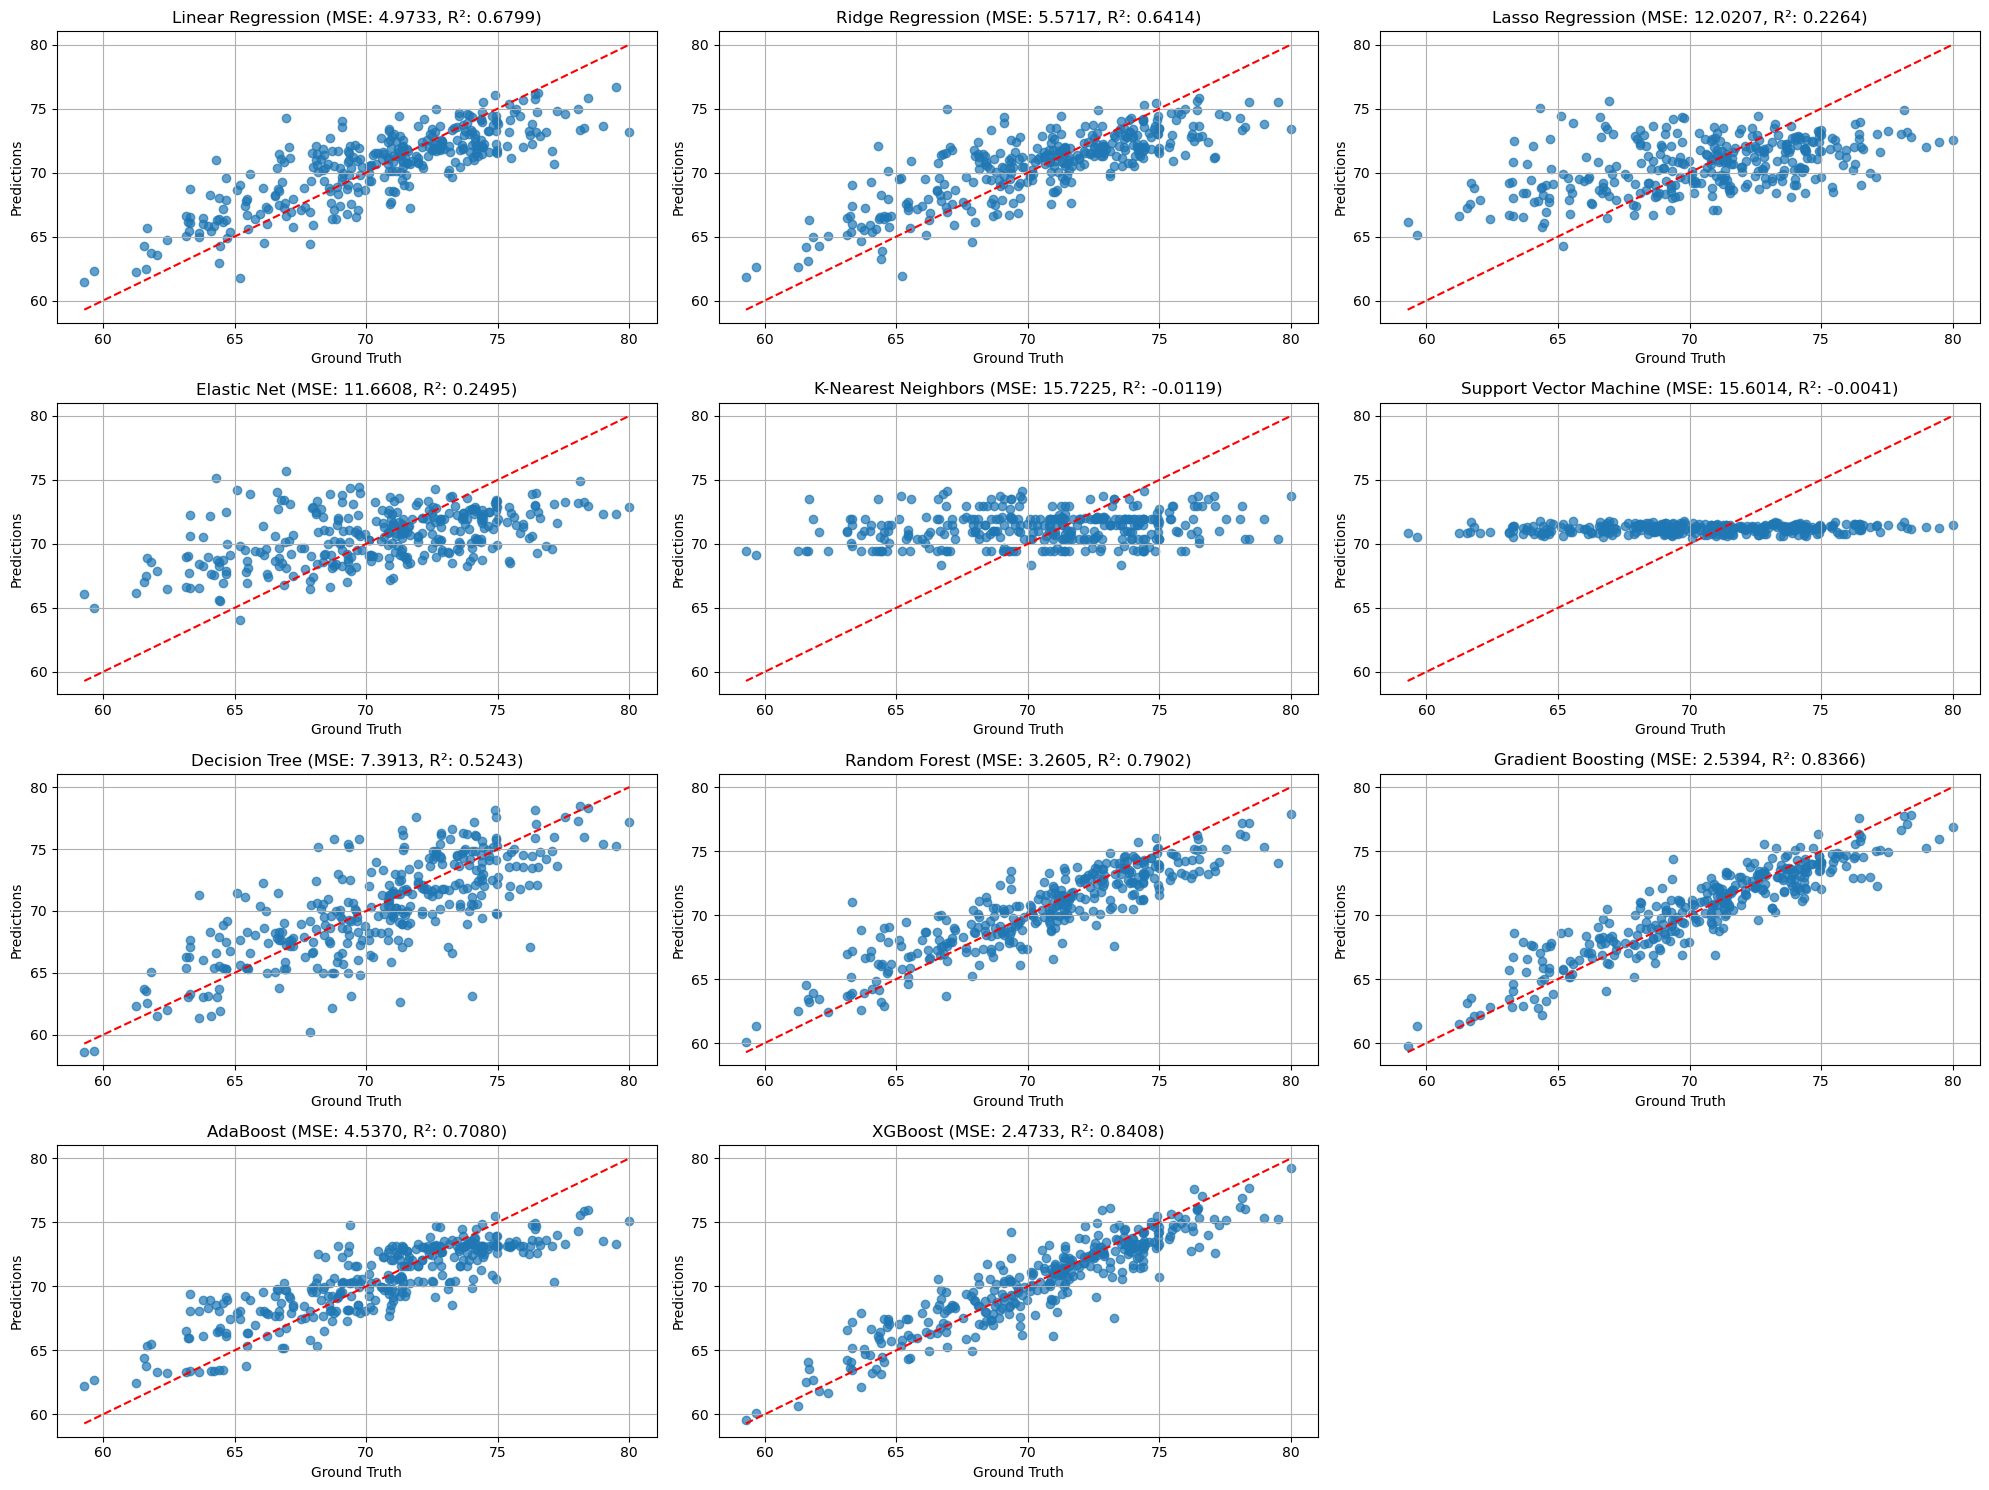

Epoch 1/50
6/6 [==============================] - 4s 111ms/step - loss: 0.9590 - val_loss: 0.7214
Epoch 2/50
6/6 [==============================] - 0s 50ms/step - loss: 0.8873 - val_loss: 0.6646
Epoch 3/50
6/6 [==============================] - 0s 47ms/step - loss: 0.7414 - val_loss: 0.6764
Epoch 4/50
6/6 [==============================] - 0s 50ms/step - loss: 0.6667 - val_loss: 0.5471
Epoch 5/50
6/6 [==============================] - 0s 51ms/step - loss: 0.6098 - val_loss: 0.5204
Epoch 6/50
6/6 [==============================] - 0s 47ms/step - loss: 0.5620 - val_loss: 0.4689
Epoch 7/50
6/6 [==============================] - 0s 47ms/step - loss: 0.5938 - val_loss: 0.4649
Epoch 8/50
6/6 [==============================] - 0s 48ms/step - loss: 0.5244 - val_loss: 0.4433
Epoch 9/50
6/6 [==============================] - 0s 49ms/step - loss: 0.5078 - val_loss: 0.4370
Epoch 10/50
6/6 [==============================] - 0s 49ms/step - loss: 0.4501 - val_loss: 0.4154
Epoch 11/50
6/6 [===========

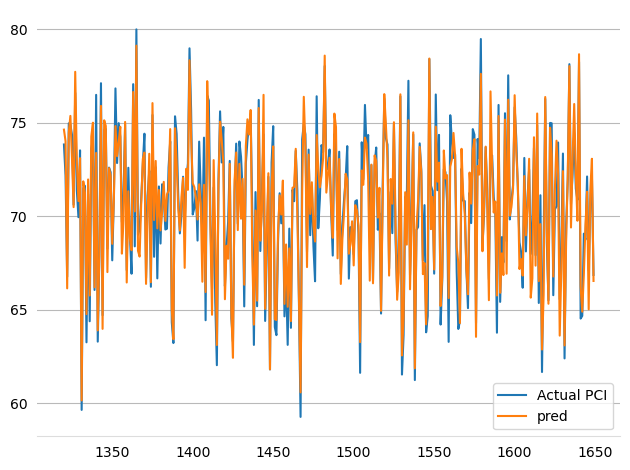

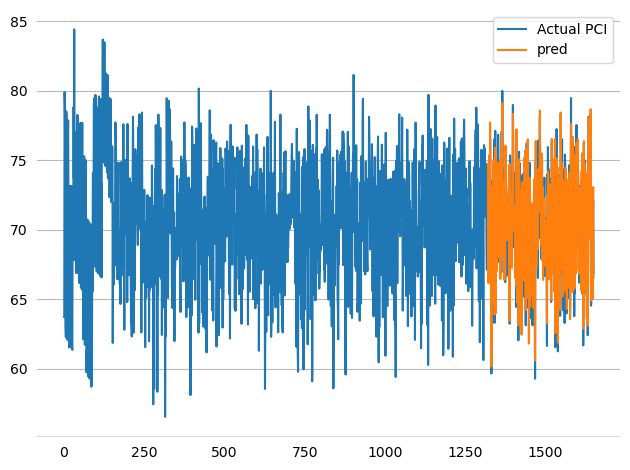

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Conv1D,Dropout, Flatten, LSTM, GRU, Input, LeakyReLU
from keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

combined_data = pd.read_csv('MMGSY_Actual_PCI.csv')

# df = df.drop(columns=["evalution_year","LL", "PL", "SN", "OMC", "CBR"])
combined_data = combined_data.drop(columns=['Part_length',"evalution_month","PL", "LL", "SN", "OMC", "CBR", 'evalution_year', 'evalution_month',])
 #['Part_length',"evalution_month","PL", "LL", "SN", "OMC", "CBR", 'evalution_year', 'evalution_month',])

x = combined_data.drop(columns = ['Actual PCI'], axis=1)
y = combined_data['Actual PCI']

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state=42, shuffle=False)

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

def regression_models_fit_predict_plot(X_train, y_train, X_test, y_test):

    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Elastic Net":ElasticNet(),
        "K-Nearest Neighbors": KNeighborsRegressor(),
        "Support Vector Machine": SVR(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "AdaBoost": AdaBoostRegressor(),
        "XGBoost": XGBRegressor(objective='reg:squarederror')
    }

    predictions = {}
    performance = {}

    plt.figure(figsize=(20, 15))  # Set figure size for all plots
    for idx, (name, model) in enumerate(models.items()):
        print(f"Training {name}...")
        # Fit the model
        model.fit(X_train, y_train)
        # Predict on test data
        y_pred = model.predict(X_test)
        predictions[name] = y_pred

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        performance[name] = {"MSE": mse, "R^2": r2}
        print(f"{name} - MSE: {mse:.4f}, R^2: {r2:.4f}")

        result = pd.DataFrame(y_test)
        result["predictions"] = pd.DataFrame(y_pred, index=result.index)

        # Plot the predictions
        plt.subplot(4, 3, idx + 1)  # Adjust grid size for all models
        plt.plot(result)
        plt.xlabel('PCI')
        plt.ylabel('Values')
        plt.title(f'{name} (MSE: {mse:.4f}, R²: {r2:.4f})')
        plt.legend(['ground Truth', 'predictions'])
        plt.grid()

    plt.tight_layout()
    plt.show()

    return {"Predictions": predictions, "Performance": performance}

result = regression_models_fit_predict_plot(xTrain, yTrain, xTest, yTest)

def regression_models_fit_predict_scatter_plot(X_train, y_train, X_test, y_test):
    # Create a directory to store the prediction files
    if not os.path.exists("MMGSY_ANN_pred"):
        os.makedirs("MMGSY_ANN_pred")

    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Elastic Net": ElasticNet(),
        "K-Nearest Neighbors": KNeighborsRegressor(),
        "Support Vector Machine": SVR(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "AdaBoost": AdaBoostRegressor(),
        "XGBoost": XGBRegressor(objective='reg:squarederror')
    }

    predictions = {}
    performance = {}

    plt.figure(figsize=(20, 15))  # Set figure size for all plots
    for idx, (name, model) in enumerate(models.items()):
        print(f"Training {name}...")
        # Fit the model
        model.fit(X_train, y_train)
        # Predict on test data
        y_pred = model.predict(X_test)
        predictions[name] = y_pred

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        performance[name] = {"MSE": mse, "R^2": r2}
        print(f"{name} - MSE: {mse:.4f}, R^2: {r2:.4f}")

        # Save the predictions and ground truth as a CSV
        result = pd.DataFrame({
            "Ground Truth": y_test,
            "Predictions": y_pred
        })
        result.to_csv(f"MMGSY_ANN_pred/{name.replace(' ', '_')}_predictions.csv", index=False)

        # Scatter plot of predictions vs. ground truth
        plt.subplot(4, 3, idx + 1)  # Adjust grid size for all models
        plt.scatter(y_test, y_pred, alpha=0.7)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Identity line
        plt.xlabel("Ground Truth")
        plt.ylabel("Predictions")
        plt.title(f'{name} (MSE: {mse:.4f}, R²: {r2:.4f})')
        plt.grid()

    plt.tight_layout()
    plt.show()

    return {"Predictions": predictions, "Performance": performance}

result = regression_models_fit_predict_scatter_plot(xTrain, yTrain, xTest, yTest)

from sklearn.preprocessing import StandardScaler
in_scl = StandardScaler()
out_scl = StandardScaler()
Y_tr = yTrain.to_numpy()
Y_tr = Y_tr.reshape(-1,1)
y_out = yTest.to_numpy()
y_out = y_out.reshape(-1,1)
X_train = in_scl.fit_transform(xTrain)
X_out = in_scl.transform(xTest)

Y_train = out_scl.fit_transform(Y_tr)
Y_out = out_scl.transform(y_out)

#Neural Network

model = Sequential()

model.add(Conv1D(256, kernel_size=3, strides=1, activation="linear", input_shape=(xTrain.shape[1],1)))
model.add(Conv1D(128, kernel_size=3, strides=1, activation="linear"))
# model.add(Conv1D(100, kernel_size=3, strides=1, activation="linear"))
model.add(LSTM(100, activation='linear', return_sequences=True))
model.add(LSTM(64, activation='linear', return_sequences=True))
model.add(GRU(32, activation='linear', return_sequences=False))
model.add(Flatten())
model.add(Dense(32, activation='linear'))
model.add(Dense(1))

model.compile(Adam(learning_rate=0.001, epsilon=1e-9, weight_decay=1e-3), loss="mean_squared_error")

#model.summary()

history = model.fit(X_train, Y_train, epochs=50, batch_size=256, verbose=1, validation_data=(X_out, Y_out))

test_predictions = model.predict(X_out)
test_mse = mean_squared_error(Y_out, test_predictions)
test_mape = mean_absolute_percentage_error(Y_out, test_predictions)
test_r2 = r2_score(Y_out, test_predictions)

print(f'Mean Squared Error on Model: {test_mse}')
print(f'Root Mean Squared Error on Model: {np.sqrt(test_mse)}')
print(f'R2-Score on Model: {test_r2}')

model.save("MMGSY_Actual_PCI.keras")

predictions = out_scl.inverse_transform(test_predictions)
#predictions

test_result = pd.DataFrame(yTest)
test_result["pred"] = pd.DataFrame(predictions, index= test_result.index)
#test_result

ax = test_result.plot(kind='line',)

for container in ax.containers:
    ax.bar_label(container,fmt='%.3f')

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#b9b9b9')
ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

result = pd.DataFrame(combined_data["Actual PCI"])
result["pred"] = test_result["pred"]

ax = result.plot(kind='line')

for container in ax.containers:
    ax.bar_label(container,fmt='%.3f')

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#b9b9b9')
ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

In [3]:
import pickle
from sklearn.metrics import mean_squared_error, r2_score

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net": ElasticNet(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Machine": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror')
}

results = []

best_model = None
best_score = -float("inf")  # initialize with very low score

# Train and evaluate each model
for name, model in models.items():
    print(f"🔹 Training {name}...")
    model.fit(xTrain, yTrain)
    y_pred = model.predict(xTest)

    mse = mean_squared_error(yTest, y_pred)
    r2 = r2_score(yTest, y_pred)

    results.append({"Model": name, "MSE": mse, "R²": r2})

    # Check if this is the best model
    if r2 > best_score:
        best_score = r2
        best_model = (name, model)

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print("\n📊 Model Performance:")
print(results_df)

# Save the best model as pickle
best_name, best_trained_model = best_model
with open("MMGSY_best_model.pkl", "wb") as f:
    pickle.dump(best_trained_model, f)

print(f"\n✅ Best model: {best_name} (R² = {best_score:.4f}) saved as MMGSY_best_model.pkl")


🔹 Training Linear Regression...
🔹 Training Ridge Regression...
🔹 Training Lasso Regression...
🔹 Training Elastic Net...
🔹 Training K-Nearest Neighbors...
🔹 Training Support Vector Machine...
🔹 Training Decision Tree...
🔹 Training Random Forest...
🔹 Training Gradient Boosting...
🔹 Training AdaBoost...
🔹 Training XGBoost...

📊 Model Performance:
                     Model        MSE        R²
10                 XGBoost   2.473343  0.840819
8        Gradient Boosting   2.541054  0.836461
7            Random Forest   3.095467  0.800780
9                 AdaBoost   4.748251  0.694409
0        Linear Regression   4.973301  0.679925
1         Ridge Regression   5.571711  0.641413
6            Decision Tree   7.216498  0.535557
3              Elastic Net  11.660827  0.249526
2         Lasso Regression  12.020660  0.226368
5   Support Vector Machine  15.601355 -0.004081
4      K-Nearest Neighbors  15.722475 -0.011876

✅ Best model: XGBoost (R² = 0.8408) saved as MMGSY_best_model.pkl


In [4]:
import pickle

# Load the saved model
with open("MMGSY_best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test prediction on your test set
y_pred_loaded = loaded_model.predict(xTest)

from sklearn.metrics import r2_score
print("R² after loading:", r2_score(yTest, y_pred_loaded))


R² after loading: 0.8408191578691744
